ECON 294A Final Project Skyler Scheetz

In [36]:
import pandas as pd

# Load the dataset
file_path = '/Users/skylerscheetz/Library/Mobile Documents/com~apple~CloudDocs/UCSC/spring 24/econ 294a/assignment 2/finalprojectdataecon294a.csv'
data = pd.read_csv(file_path)



# Pivot the cleaned dataframe
pivoted_data = data.pivot(index='Year', columns='Series ID', values='Value')

# Reset the index to make 'Year' a column
pivoted_data.reset_index(inplace=True)

data_cleaned1 = pivoted_data.dropna()


# Save the transformed dataframe to a new CSV file
output_file_path = '/Users/skylerscheetz/Library/Mobile Documents/com~apple~CloudDocs/UCSC/spring 24/econ 294a/assignment 2/econ294finaldataclean.csv'
data_cleaned1.to_csv(output_file_path, index=False)


In [37]:
print(data_cleaned1.head())

Series ID  Year  15-19  20-24  25-34  35-44  45-54  55-64  65-74  employed  \
3          2006   0.69   0.40   0.30   0.18   0.20   0.25   0.28      0.13   
4          2007   0.78   0.46   0.27   0.23   0.19   0.23   0.43      0.14   
5          2008   0.70   0.33   0.33   0.25   0.12   0.23   0.35      0.14   
6          2009   0.84   0.40   0.35   0.23   0.25   0.29   0.41      0.16   
7          2010   0.85   0.65   0.37   0.29   0.19   0.29   0.38      0.18   

Series ID   men  women  
3          0.18   0.10  
4          0.15   0.10  
5          0.13   0.13  
6          0.19   0.11  
7          0.19   0.19  


In [38]:
# List of columns to check
columns_to_check = ["15-19", "20-24", "25-34", "45-54", "55-64", "65-74", "employed", "men", "women"]

# Create the 'hour' indicator variable
data_cleaned1['hour'] = (data_cleaned1[columns_to_check] > 1.0).any(axis=1).astype(int)


/var/folders/1t/dtt_p9js69s_cbyygbthqd8h0000gn/T/ipykernel_79825/2696925172.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned1['hour'] = (data_cleaned1[columns_to_check] > 1.0).any(axis=1).astype(int)


In [39]:
print(data_cleaned1)

Series ID  Year  15-19  20-24  25-34  35-44  45-54  55-64  65-74  employed  \
3          2006   0.69   0.40   0.30   0.18   0.20   0.25   0.28      0.13   
4          2007   0.78   0.46   0.27   0.23   0.19   0.23   0.43      0.14   
5          2008   0.70   0.33   0.33   0.25   0.12   0.23   0.35      0.14   
6          2009   0.84   0.40   0.35   0.23   0.25   0.29   0.41      0.16   
7          2010   0.85   0.65   0.37   0.29   0.19   0.29   0.38      0.18   
8          2011   1.03   0.78   0.42   0.30   0.23   0.31   0.45      0.18   
9          2012   0.77   0.87   0.37   0.26   0.29   0.25   0.43      0.18   
10         2013   0.88   0.62   0.38   0.25   0.26   0.32   0.52      0.17   
11         2014   0.75   0.82   0.33   0.28   0.25   0.35   0.49      0.19   
12         2015   0.98   0.66   0.27   0.22   0.22   0.32   0.44      0.16   
13         2016   0.74   0.66   0.44   0.21   0.19   0.27   0.49      0.16   
14         2017   1.01   1.10   0.43   0.19   0.30   0.30   0.48

In [40]:
# Save the transformed dataframe to a new CSV file
output_file_path = '/Users/skylerscheetz/Library/Mobile Documents/com~apple~CloudDocs/UCSC/spring 24/econ 294a/assignment 2/econ294finaldataclean.csv'
data_cleaned1.to_csv(output_file_path, index=False)

/var/folders/1t/dtt_p9js69s_cbyygbthqd8h0000gn/T/ipykernel_79825/3439845228.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned1['hour'] = (data_cleaned1[columns_to_check] > 1.0).any(axis=1).astype(int)
/Users/skylerscheetz/.pyenv/versions/3.9.18/lib/python3.9/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


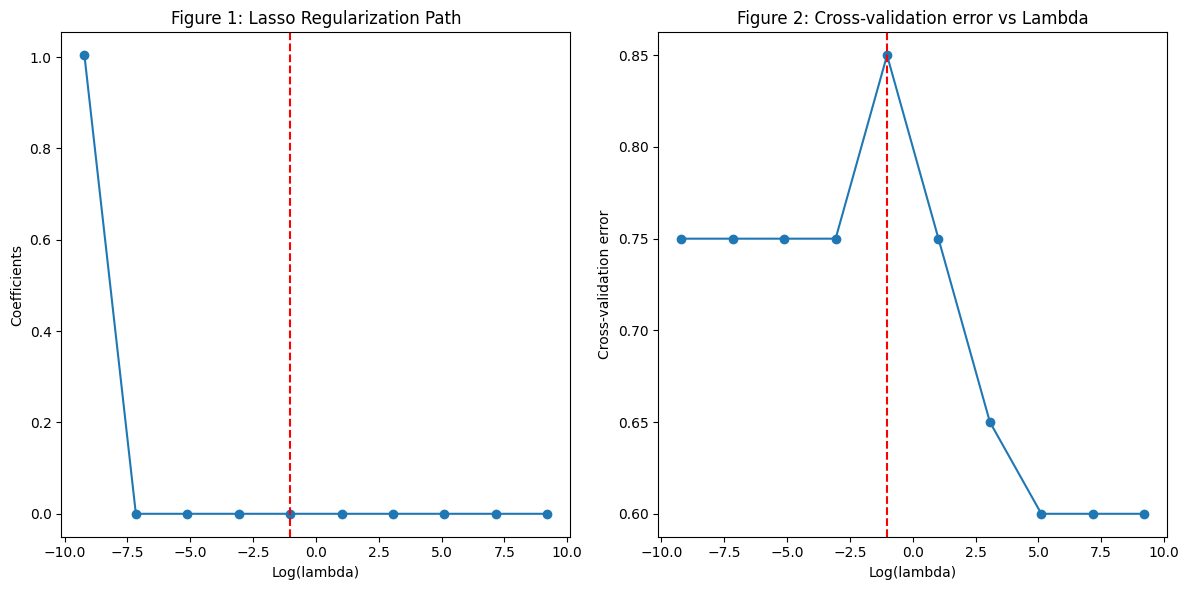

Number of regressors: 10
Number of nonzero regressors: 1
Nonzero coefficients:
Series ID
15-19    1.003959
dtype: float64
Strong predictors:
Series ID
15-19    1.003959
dtype: float64


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline



# List of columns to check
columns_to_check = ["15-19", "20-24", "25-34", "45-54", "55-64", "65-74", "employed", "men", "women"]

# Create the 'hour' indicator variable
data_cleaned1['hour'] = (data_cleaned1[columns_to_check] > 1.0).any(axis=1).astype(int)

# Split the data into features and target variable
X = data_cleaned1.drop(columns=['Year', 'hour'])
y = data_cleaned1['hour']

# Standardize the data and apply logistic regression with lasso regularization
model = make_pipeline(
    StandardScaler(),
    LogisticRegressionCV(
        cv=10,
        penalty='l1',
        solver='saga',
        max_iter=10000
    )
)

# Fit the model
model.fit(X, y)

# Extract the best C (inverse of regularization strength) and the associated coefficients
best_c = model.named_steps['logisticregressioncv'].C_[0]
coefs = model.named_steps['logisticregressioncv'].coef_.flatten()

# Plotting the regularization path and cross-validation error
mean_scores = model.named_steps['logisticregressioncv'].scores_[1].mean(axis=0)
plt.figure(figsize=(12, 6))

# Regularization path plot
plt.subplot(1, 2, 1)
plt.plot(np.log(model.named_steps['logisticregressioncv'].Cs_), coefs, marker='o')
plt.axvline(np.log(best_c), color='r', linestyle='--')
plt.xlabel('Log(lambda)')
plt.ylabel('Coefficients')
plt.title('Figure 1: Lasso Regularization Path')

# Cross-validation error plot
plt.subplot(1, 2, 2)
plt.plot(np.log(model.named_steps['logisticregressioncv'].Cs_), mean_scores, marker='o')
plt.axvline(np.log(best_c), color='r', linestyle='--')
plt.xlabel('Log(lambda)')
plt.ylabel('Cross-validation error')
plt.title('Figure 2: Cross-validation error vs Lambda')

plt.tight_layout()
plt.show()

# Number of regressors and nonzero regressors
num_regressors = len(coefs)
num_nonzero_regressors = np.sum(coefs != 0)
print(f"Number of regressors: {num_regressors}")
print(f"Number of nonzero regressors: {num_nonzero_regressors}")

# Nonzero coefficients
nonzero_coefs = pd.Series(coefs, index=X.columns)[coefs != 0]
print("Nonzero coefficients:")
print(nonzero_coefs)

# Strong predictors
strong_predictors = nonzero_coefs[nonzero_coefs.abs() > 0.1]  # Example threshold for "strong"
print("Strong predictors:")
print(strong_predictors)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold

/Users/skylerscheetz/.pyenv/versions/3.9.18/lib/python3.9/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


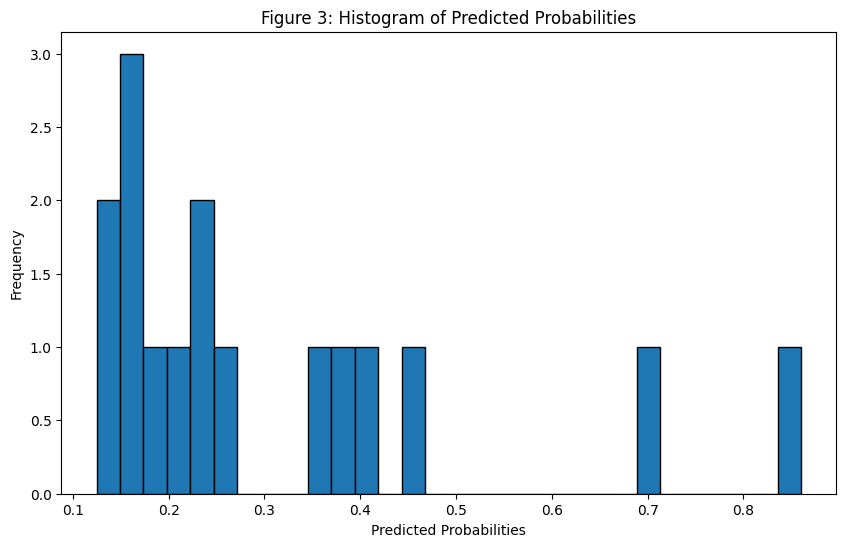

In [47]:
# Set number of splits for cross-validation
n_splits = 10

# Standardize the data and apply logistic regression with lasso regularization
model = make_pipeline(
    StandardScaler(),
    LogisticRegressionCV(
        cv=StratifiedKFold(n_splits=n_splits),
        penalty='l1',
        solver='saga',
        max_iter=10000
    )
)

# Fit the model
model.fit(X, y)

# Predict probabilities for each observation in the dataset
predicted_probabilities = model.predict_proba(X)[:, 1]

# Plot the histogram of predicted probabilities
plt.figure(figsize=(10, 6))
plt.hist(predicted_probabilities, bins=30, edgecolor='k')
plt.title('Figure 3: Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.show()


/var/folders/1t/dtt_p9js69s_cbyygbthqd8h0000gn/T/ipykernel_79825/1334401366.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned1['hour'] = (data_cleaned1[columns_to_check] > 1.0).any(axis=1).astype(int)


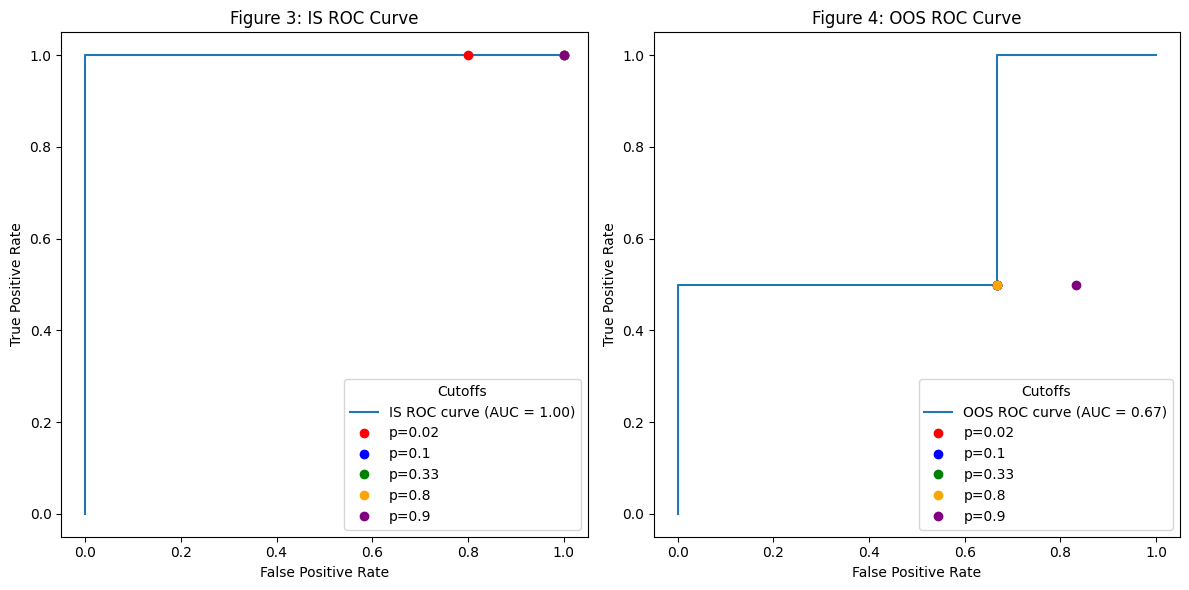

In [43]:

columns_to_check = ["15-19", "20-24", "25-34", "45-54", "55-64", "65-74", "employed", "men", "women"]

# Create the 'hour' indicator variable
data_cleaned1['hour'] = (data_cleaned1[columns_to_check] > 1.0).any(axis=1).astype(int)

# Split the data into features and target variable
X = data_cleaned1.drop(columns=['Year', 'hour'])
y = data_cleaned1['hour']

# Set seed for reproducibility
np.random.seed(0)

# Split the data into in-sample (IS) and out-of-sample (OOS) sets
n = len(data_cleaned1)
test_indices = np.random.choice(n, size=n // 2, replace=False)
train_indices = np.setdiff1d(np.arange(n), test_indices)

X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

# Determine the number of splits for cross-validation
n_splits = min(5, np.bincount(y_train).min())

# Standardize the data and apply logistic regression with lasso regularization
model = make_pipeline(
    StandardScaler(),
    LogisticRegressionCV(
        cv=StratifiedKFold(n_splits=n_splits),
        penalty='l1',
        solver='saga',
        max_iter=10000
    )
)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict probabilities
pred_train = model.predict_proba(X_train)[:, 1]
pred_test = model.predict_proba(X_test)[:, 1]

# Compute ROC curves and AUC
fpr_train, tpr_train, _ = roc_curve(y_train, pred_train)
fpr_test, tpr_test, _ = roc_curve(y_test, pred_test)
auc_train = roc_auc_score(y_train, pred_train)
auc_test = roc_auc_score(y_test, pred_test)

# Plot ROC curves
plt.figure(figsize=(12, 6))

# IS ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr_train, tpr_train, label=f'IS ROC curve (AUC = {auc_train:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 4: IS ROC Curve')
plt.legend(loc='lower right')

# OOS ROC curve
plt.subplot(1, 2, 2)
plt.plot(fpr_test, tpr_test, label=f'OOS ROC curve (AUC = {auc_test:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 5: OOS ROC Curve')
plt.legend(loc='lower right')

# Cutoff values
cutoffs = [0.02, 0.1, 0.33, 0.8, 0.9]
colors = ['red', 'blue', 'green', 'orange', 'purple']

for cutoff, color in zip(cutoffs, colors):
    # IS cutoff points
    classif_rule_train = (pred_train > cutoff)
    sensitivity_train = np.mean(classif_rule_train[y_train == 1])
    specificity_train = 1 - np.mean((1 - classif_rule_train)[y_train == 0])
    plt.subplot(1, 2, 1)
    plt.plot(1 - specificity_train, sensitivity_train, 'o', color=color, label=f'p={cutoff}')

    # OOS cutoff points
    classif_rule_test = (pred_test > cutoff)
    sensitivity_test = np.mean(classif_rule_test[y_test == 1])
    specificity_test = 1 - np.mean((1 - classif_rule_test)[y_test == 0])
    plt.subplot(1, 2, 2)
    plt.plot(1 - specificity_test, sensitivity_test, 'o', color=color, label=f'p={cutoff}')

plt.subplot(1, 2, 1)
plt.legend(loc='lower right', title='Cutoffs')

plt.subplot(1, 2, 2)
plt.legend(loc='lower right', title='Cutoffs')

plt.tight_layout()
plt.show()